### 필수과제1
- 본인이 생각하는 y값과 연관이 있는 피처들은 무엇인지에 대한 기준을 정해서 정리해 주세요!
- 코드로 시각화 및 통계적인 분석 등 다양하게 접근하셔서
- Y값과 컬럼들간의 유의미한 차이를 확인해 주세요!

# 자전거 수요 예측 데이터
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    - -1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - -2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - -3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - -4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

# Data Load

In [8]:
import pandas as pd
bk = pd.read_csv('train_bk.csv')
bk

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [34]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  year        10886 non-null  object        
 14  month       10886 non-null  object        
 15  day         10886 non-null  object        
 16  hour        10886 non-

# 각 칼럼 별 확인


## datetime 칼럼
- datetime : 날짜(년월일) + 시각(시분초)으로 구성되어 있음
- 1. 날짜
  - 주별 count합, 월별 count 합 비교 & 그래프 확인
  - 월별 차이도 존재하지만, 주별 차이가 크게 존재
  - 주별 합 확인했을 때 count 합이 0인 주도 존재하기 때문에 월별로 묶는 것은 좋지 않다고 생각됨
  - **주별로 묶어서 분석**하는게 좋다고 생각된다!
- 2. 시각
  - **hou**r는 count와 상관관계가 0.4로 높은 편.
  - 분과 초는 모두 00으로 통일 되어 있으므로 분석할 거리 없음


In [9]:
# datetime 칼럼 분해
bk['date'] = bk['datetime'].apply(lambda x:x.split()[0])
bk['year'] = bk['datetime'].apply(lambda x:x.split('-')[0])
bk['month'] = bk['datetime'].apply(lambda x:x.split()[0].split('-')[1])
bk['day'] = bk['datetime'].apply(lambda x:x.split()[0].split('-')[2])

bk['hour'] = bk['datetime'].apply(lambda x:x.split()[1].split(':')[0])
# bk['minute'] = bk['datetime'].apply(lambda x:x.split()[1].split(':')[1]) minute는 00으로 통일 되어 있음
# bk['second'] = bk['datetime'].apply(lambda x:x.split()[1].split(':')[2]) second는 00으로 통일 되어 있음

In [53]:
#요일도 뽑을 수 있다.
from datetime import datetime
import calendar
bk['weekday'] = bk['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [10]:
bk

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22


In [22]:
# 시계열 칼럼을 index로 지정
bk['datetime']=pd.to_datetime(bk['datetime'])
new_bk = bk.set_index('datetime')
new_bk

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21


In [33]:
# 주별 count 합
new_bk['count'].resample('W').sum().head(30)

datetime
2011-01-02     1786
2011-01-09     9408
2011-01-16     9025
2011-01-23     3333
2011-01-30        0
2011-02-06     8772
2011-02-13    11192
2011-02-20    12880
2011-02-27        0
2011-03-06    10296
2011-03-13    13045
2011-03-20    15394
2011-03-27        0
2011-04-03     7728
2011-04-10    17680
2011-04-17    18476
2011-04-24     6633
2011-05-01     3351
2011-05-08    29573
2011-05-15    30278
2011-05-22    16511
2011-05-29        0
2011-06-05    24502
2011-06-12    31709
2011-06-19    33565
2011-06-26        0
2011-07-03    15130
2011-07-10    34186
2011-07-17    34533
2011-07-24     8999
Freq: W-SUN, Name: count, dtype: int64

<Axes: xlabel='datetime'>

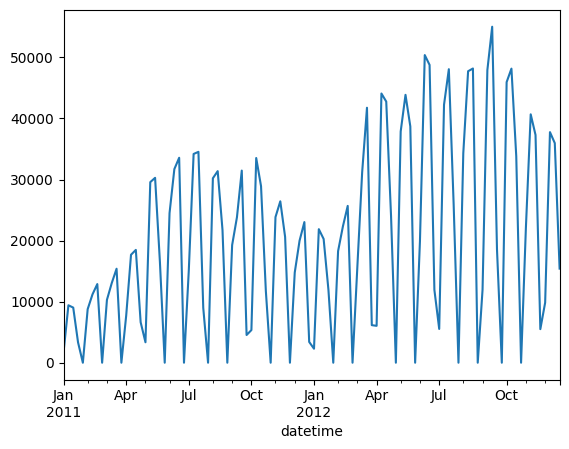

In [31]:
new_bk['count'].resample('W').sum().plot()

In [26]:
# 월별 count 합
new_bk['count'].resample('M').sum()

datetime
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: M, Name: count, dtype: int64

<Axes: xlabel='datetime'>

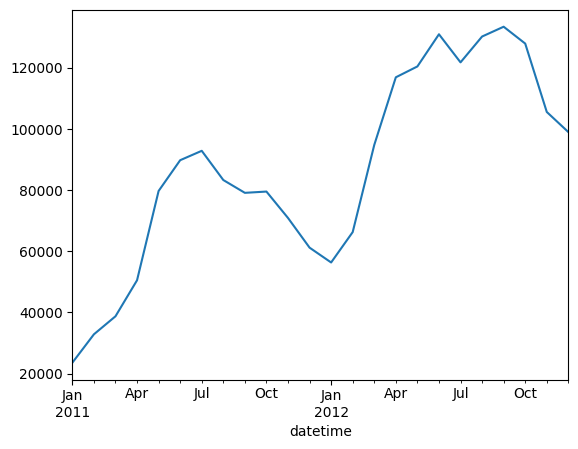

In [49]:
new_bk['count'].resample('M').sum().plot()
# 2012년도에 값이 훨씬 높긴 하지만 대체적으로 가을 > 여름 > 겨울 > 봄의 형태이다

In [27]:
# 연도별 count 합
new_bk['count'].resample('Y').sum()

datetime
2011-12-31     781979
2012-12-31    1303497
Freq: A-DEC, Name: count, dtype: int64

In [55]:
bk.groupby('weekday')['count'].mean()
# 요일별 차이는 크게 있지 않아보임

weekday
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

In [39]:
for i in bk.columns:
    if bk[i].dtype=='object':
      if i != 'date':
        bk = bk.astype({i:'int'})
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [41]:
bk.corr()
# hour가 count와 상관관계가 높네!

<ipython-input-41-de9daa231e3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bk.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


## season 칼럼
- season별 count 평균을 봤을 때 차이가 큼
- 월별 count 그래프를 확인해봤을 때도 가을>여름>겨울>봄 형태로 값의 차이 존재!
- season별 count 차이 존재!

In [48]:
# season별 count 평균
bk. groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

## holiday
- 상관관계 확인에서도 그렇고, 평균확인에서도 그렇고 holiday는 영향을 미치는 변수는 아니라고 생각됨

In [50]:
bk.groupby('holiday')['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

## workingday
- 상관관계 확인에서도 그렇고, 평균확인에서도 그렇고 workingday 영향을 미치는 변수는 아니라고 생각됨

In [51]:
bk.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

## weather
- weather 별 count 평균 차이 매우 큼
- 상관관계에서는 순서형 척도가 아니라 나타나지 않았지만 더미변수로 만들면 좋은 변수 될 수 있다고 생가됨

In [56]:
bk.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

## temp
- temp와 count가 완벽하게 비례관계는 아니였기 때문에 상관관계에서는 큰 값을 가지지 못함
- temp값이 증가할 때 count의 평균이 증가하다가 살짝 감소하는 형태
- **temp에 따라 count값 차이 분명하게 존재**
- 분석하기에 필요한 변수라고 생각됨

In [57]:
bk.groupby('temp')['count'].mean()

temp
0.82      77.714286
1.64      91.500000
2.46      43.000000
3.28      19.272727
4.10      50.272727
4.92      58.416667
5.74      53.233645
6.56      68.109589
7.38      67.754717
8.20      81.995633
9.02      73.616935
9.84      86.442177
10.66     92.560241
11.48    111.066298
12.30    120.002597
13.12    148.547753
13.94    145.053269
14.76    152.957173
15.58    179.682353
16.40    170.217500
17.22    182.609551
18.04    160.878049
18.86    159.692118
19.68    185.058824
20.50    204.672783
21.32    196.480663
22.14    184.717122
22.96    212.392405
23.78    235.650246
24.60    237.182051
25.42    222.062035
26.24    232.403974
27.06    211.025381
27.88    203.433036
28.70    257.679157
29.52    277.691218
30.34    303.193980
31.16    352.801653
31.98    318.683673
32.80    355.623762
33.62    348.323077
34.44    340.225000
35.26    342.934211
36.08    362.869565
36.90    318.717391
37.72    332.176471
38.54    238.857143
39.36    317.833333
41.00    294.000000
Name: count, dt

## atemp
- atemp 변수도 위의 temp 변수와 동일하게 필요한 변수라고 생각됨
- 다만, atemp가 temp와 매우 유사한 변수이기 때문에 temp와 다중공선성 문제 우려됨

In [58]:
bk.groupby('atemp')['count'].mean()

atemp
0.760       1.000000
1.515       3.000000
2.275      38.000000
3.030      82.285714
3.790      39.062500
4.545      66.090909
5.305      63.200000
6.060      64.876712
6.820      56.380952
7.575      55.933333
8.335      58.444444
9.090      80.000000
9.850      81.456693
10.605     95.951807
11.365     90.442804
12.120    102.656410
12.880     89.518219
13.635     94.308017
14.395    116.483271
15.150    133.967456
15.910    133.897638
16.665    148.509186
17.425    147.799363
18.180    133.585366
18.940    149.555556
19.695    179.682353
20.455    170.217500
21.210    182.609551
21.970    160.878049
22.725    159.692118
23.485    185.058824
24.240    204.672783
25.000    195.109589
25.760    179.626478
26.515    212.392405
27.275    200.503546
28.030    133.312500
28.790    142.771429
29.545    151.046693
30.305    227.291429
31.060    308.323398
31.820    258.655518
32.575    331.746324
33.335    244.107143
34.090    295.183036
34.850    277.448763
35.605    312.144654
36.365 

## humidity
- **humidity도 count와 연관성이 높은 변수**라고 생각됨
- humidity가 증가할 때 count도 대체적으로 증가하지만 50을 넘어가게 되면 점차 감소하는 형태를 보여줌
- humidity를 5나 10단위로 쪼개서 범주형 변수로 바꿔주는 것도 좋을 듯


In [60]:
bk.groupby('humidity')['count'].mean().head(30)

humidity
0      28.318182
8      77.000000
10    107.000000
12     29.000000
13     17.000000
14     19.000000
15     73.000000
16    185.250000
17    290.500000
18    270.571429
19    277.733333
20    360.200000
21    284.562500
22    360.111111
23    314.540541
24    324.891892
25    288.062500
26    309.230769
27    313.163265
28    259.426230
29    292.492308
30    296.266667
31    306.912500
32    296.500000
33    261.057692
34    316.741935
35    295.056075
36    318.581395
37    274.348993
38    301.133858
Name: count, dtype: float64

In [62]:
bk.groupby('humidity')['count'].mean()[30:].head(30)

humidity
39    285.444444
40    249.041916
41    261.048913
42    265.150376
43    265.632124
44    220.013245
45    257.377622
46    247.898785
47    167.630137
48    247.038760
49    226.038462
50    183.878947
51    233.496894
52    193.986239
53    217.510753
54    209.384146
55    238.433036
56    156.485577
57    233.758621
58    237.672619
59    179.179775
60    183.135802
61    178.926829
62    248.034653
63    170.778846
64    212.351562
65    176.079051
66    202.621951
67    143.409091
68    189.427481
Name: count, dtype: float64

In [61]:
bk.groupby('humidity')['count'].mean().tail(30)

humidity
68     189.427481
69     158.859903
70     172.440154
71     157.401869
72     169.051471
73     181.907692
74     182.426396
75      96.867257
76     116.659722
77     161.803279
78     147.807292
79     163.536913
80      63.116667
81     107.574713
82     148.255000
83     144.186709
84     134.613333
85      55.000000
86      71.075000
87      98.982699
88     122.961957
89     117.846667
90     149.750000
91     119.000000
92      76.000000
93      71.151220
94      88.475309
96      71.000000
97      64.000000
100     66.493243
Name: count, dtype: float64

## windspeed
- windspeed 변수도 humidity 변수와 동일하게 증가하는 감소 형태
-  **windspeed에 따른 count 차이 확실하게 존재**
- 평균과의 거리로 새롭게 변수를 바꾸든, 5단위나 10단위로 쪼개서 범주형 변수를 생성하든 변수 활용하면 좋다고 생각됨


In [63]:
bk.groupby('windspeed')['count'].mean().head(30)

windspeed
0.0000     161.101295
6.0032     147.864679
7.0015     169.852031
8.9981     175.645536
11.0014    202.262062
12.9980    202.249520
15.0013    210.833507
16.9979    214.847087
19.0012    218.051775
19.9995    225.235772
22.0028    185.053763
23.9994    220.010949
26.0027    228.744681
27.9993    219.363636
30.0026    217.171171
31.0009    208.955056
32.9975    184.075000
35.0008    230.155172
36.9974    197.045455
39.0007    176.888889
40.9973    189.363636
43.0006    137.916667
43.9989    192.375000
46.0022     67.333333
47.9988    140.500000
50.0021    171.000000
51.9987      5.000000
56.9969    269.500000
Name: count, dtype: float64

In [66]:
bk.groupby('humidity')['count'].mean()[30:].head(30)

humidity
39    285.444444
40    249.041916
41    261.048913
42    265.150376
43    265.632124
44    220.013245
45    257.377622
46    247.898785
47    167.630137
48    247.038760
49    226.038462
50    183.878947
51    233.496894
52    193.986239
53    217.510753
54    209.384146
55    238.433036
56    156.485577
57    233.758621
58    237.672619
59    179.179775
60    183.135802
61    178.926829
62    248.034653
63    170.778846
64    212.351562
65    176.079051
66    202.621951
67    143.409091
68    189.427481
Name: count, dtype: float64

In [64]:
bk.groupby('humidity')['count'].mean().tail(30)

humidity
68     189.427481
69     158.859903
70     172.440154
71     157.401869
72     169.051471
73     181.907692
74     182.426396
75      96.867257
76     116.659722
77     161.803279
78     147.807292
79     163.536913
80      63.116667
81     107.574713
82     148.255000
83     144.186709
84     134.613333
85      55.000000
86      71.075000
87      98.982699
88     122.961957
89     117.846667
90     149.750000
91     119.000000
92      76.000000
93      71.151220
94      88.475309
96      71.000000
97      64.000000
100     66.493243
Name: count, dtype: float64

## casual & registered
- casual+ registered = count 값으로
- 둘 중 하나가 증가해도 count가 증가하는 형태로 상관관계 값이 높게 나올 수 밖에 없음
- 다만 casual, registered가 다중공선성 문제가 우려됨, 두 변수 모두 사용도 해보고, 하나만도 사용해보고 확인 해야함
- **둘 중 하나 이상 변수를 사용하는 것은 필요하다고 생각됨**

In [69]:
bk.groupby('casual')['count'].mean().head(30)

casual
0      12.986815
1      26.523238
2      36.318275
3      57.057078
4      69.697740
5      77.713855
6      88.828996
7     106.168000
8     117.656000
9     125.160870
10    131.957746
11    150.487047
12    148.236842
13    178.917808
14    149.781022
15    178.020548
16    175.368794
17    179.716418
18    177.921875
19    192.205674
20    218.141667
21    214.534483
22    206.480769
23    215.701149
24    222.031579
25    228.592233
26    233.285714
27    224.669355
28    238.809524
29    223.757576
Name: count, dtype: float64